In [30]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

%load_ext autoreload
%autoreload 2

## Define components

### Test NMF reproducability

In [58]:
simulate_dataframe_or_series(10, 10, random_seed=1)

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.417022,0.720324,0.000114,0.302333,0.146756,0.092339,0.186260,0.345561,0.396767,0.538817
Feature 1,0.419195,0.685220,0.204452,0.878117,0.027388,0.670468,0.417305,0.558690,0.140387,0.198101
Feature 2,0.800745,0.968262,0.313424,0.692323,0.876389,0.894607,0.085044,0.039055,0.169830,0.878143
Feature 3,0.098347,0.421108,0.957890,0.533165,0.691877,0.315516,0.686501,0.834626,0.018288,0.750144
Feature 4,0.988861,0.748166,0.280444,0.789279,0.103226,0.447894,0.908596,0.293614,0.287775,0.130029
Feature 5,0.019367,0.678836,0.211628,0.265547,0.491573,0.053363,0.574118,0.146729,0.589306,0.699758
Feature 6,0.102334,0.414056,0.694400,0.414179,0.049953,0.535896,0.663795,0.514889,0.944595,0.586555
Feature 7,0.903402,0.137475,0.139276,0.807391,0.397677,0.165354,0.927509,0.347766,0.750812,0.725998
Feature 8,0.883306,0.623672,0.750942,0.348898,0.269928,0.895886,0.428091,0.964840,0.663441,0.621696
Feature 9,0.114746,0.949489,0.449912,0.578390,0.408137,0.237027,0.903380,0.573679,0.002870,0.617145


In [51]:
from ccal.machine_learning.simulate import simulate_dataframe_or_series
matrix = simulate_dataframe_or_series(10, 10, random_seed=1)

Sample Feature
<145421> Computing cophenetic correlation coefficient of 100 NMF consensus clusterings ...
<145421> Parallelizing ...
<145421> NMF and scoring k=3 ...
<145421> 	(k=3) NMF (0/100) ...
<145421> 		(k=3) Saved the 1st NMF decomposition.
<145421> 	(k=3) NMF (10/100) ...
<145421> 	(k=3) NMF (20/100) ...
<145422> 	(k=3) NMF (30/100) ...
<145422> 	(k=3) NMF (40/100) ...
<145422> 	(k=3) NMF (50/100) ...
<145422> 	(k=3) NMF (60/100) ...
<145422> 	(k=3) NMF (70/100) ...
<145423> 	(k=3) NMF (80/100) ...
<145423> 	(k=3) NMF (90/100) ...
<145423> 	(k=3) Making consensus matrix from 100 NMF ...
<145423> NMF and scoring k=4 ...
<145423> 	(k=4) NMF (0/100) ...
<145423> 		(k=4) Saved the 1st NMF decomposition.
<145423> 	(k=4) NMF (10/100) ...
<145424> 	(k=4) NMF (20/100) ...
<145424> 	(k=4) NMF (30/100) ...
<145424> 	(k=4) NMF (40/100) ...
<145424> 	(k=4) NMF (50/100) ...
<145424> 	(k=4) NMF (60/100) ...
<145425> 	(k=4) NMF (70/100) ...
<145425> 	(k=4) NMF (80/100) ...
<145425> 	(k=4) NMF

({3: {'e': 18898.005858793986,
   'h':     Sample 0   Sample 1   Sample 2   Sample 3   Sample 4   Sample 5  \
   0   0.000000  42.713333  43.711829   5.777717  71.793140  19.166671   
   1  58.958442   0.000000  99.117303  53.778609  49.757924  67.625376   
   2  60.452695  57.468418   0.714043  58.510649   5.874114  40.549823   
   
        Sample 6    Sample 7    Sample 8   Sample 9  
   0   10.788445   18.909074    6.775767  63.600886  
   1  111.526431  117.331088  119.082815  71.914933  
   2   17.387876    7.553128   12.403301   0.000000  ,
   'w':                     0          1           2
   Feature 0   35.220679  14.949179   55.589482
   Feature 1    0.000000  27.426897  109.762735
   Feature 2  133.372992   0.000000  104.837264
   Feature 3   96.563508  45.313407    0.000000
   Feature 4    1.614287  33.685122  123.697510
   Feature 5   83.049300  23.011838    0.000000
   Feature 6    0.000000  63.618457   16.473775
   Feature 7    6.126267  59.949422   58.549544
   Feature

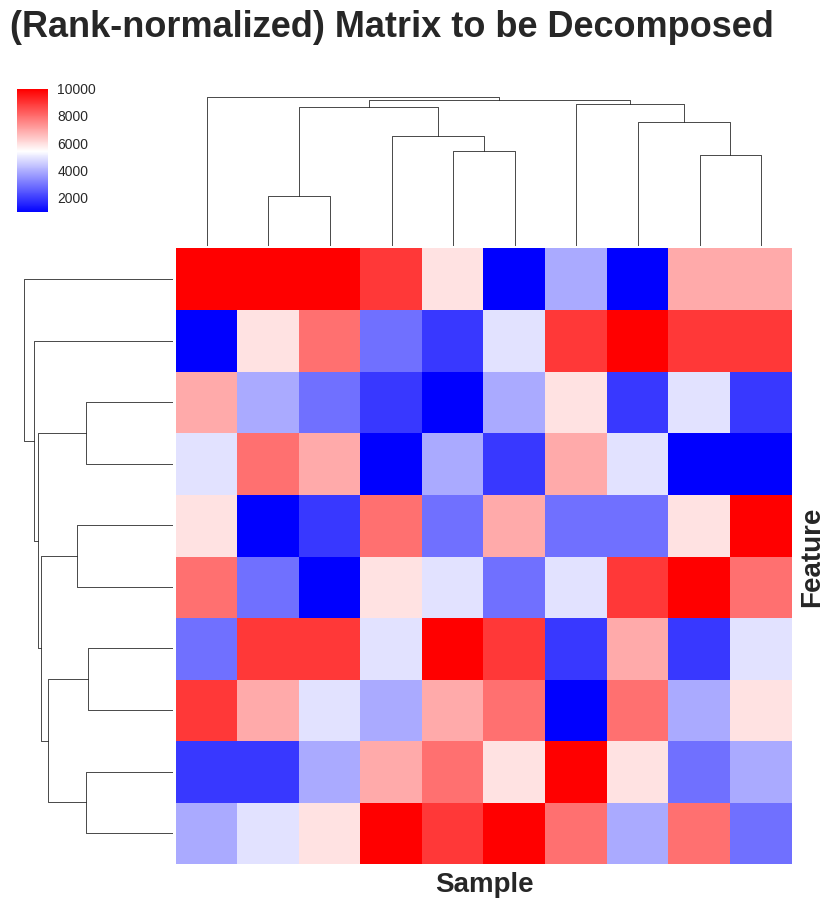

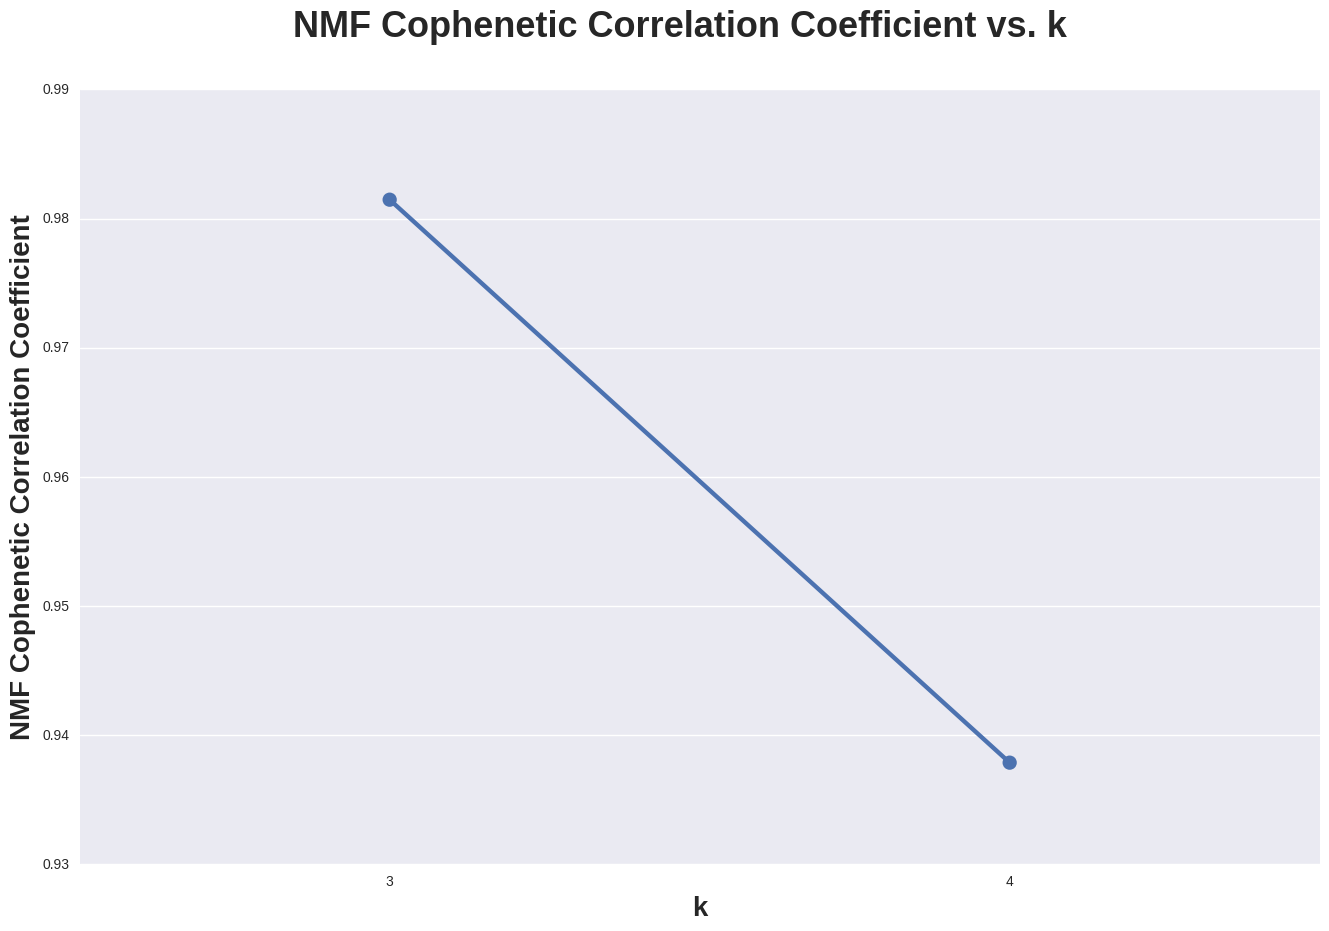

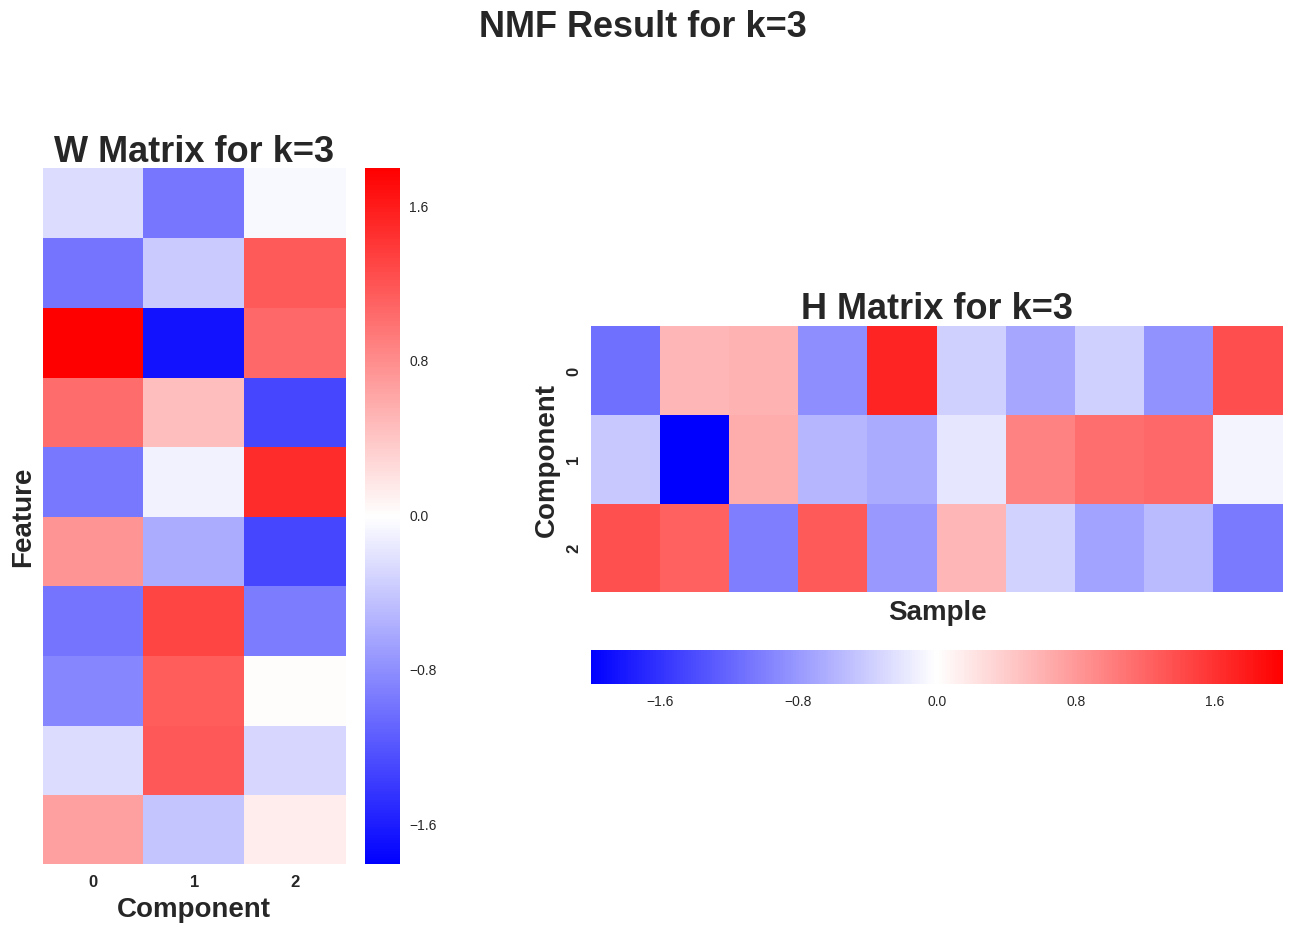

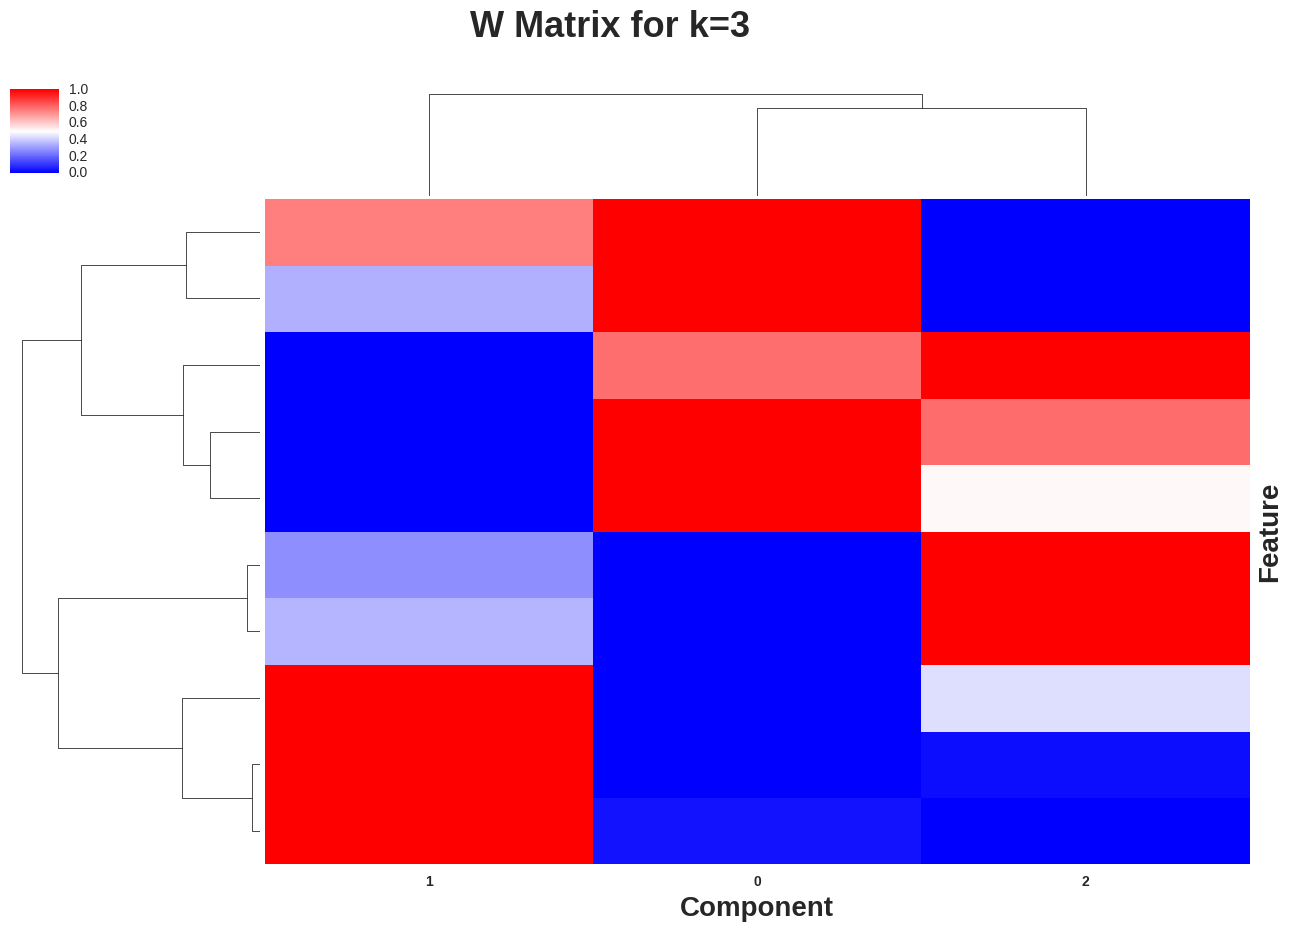

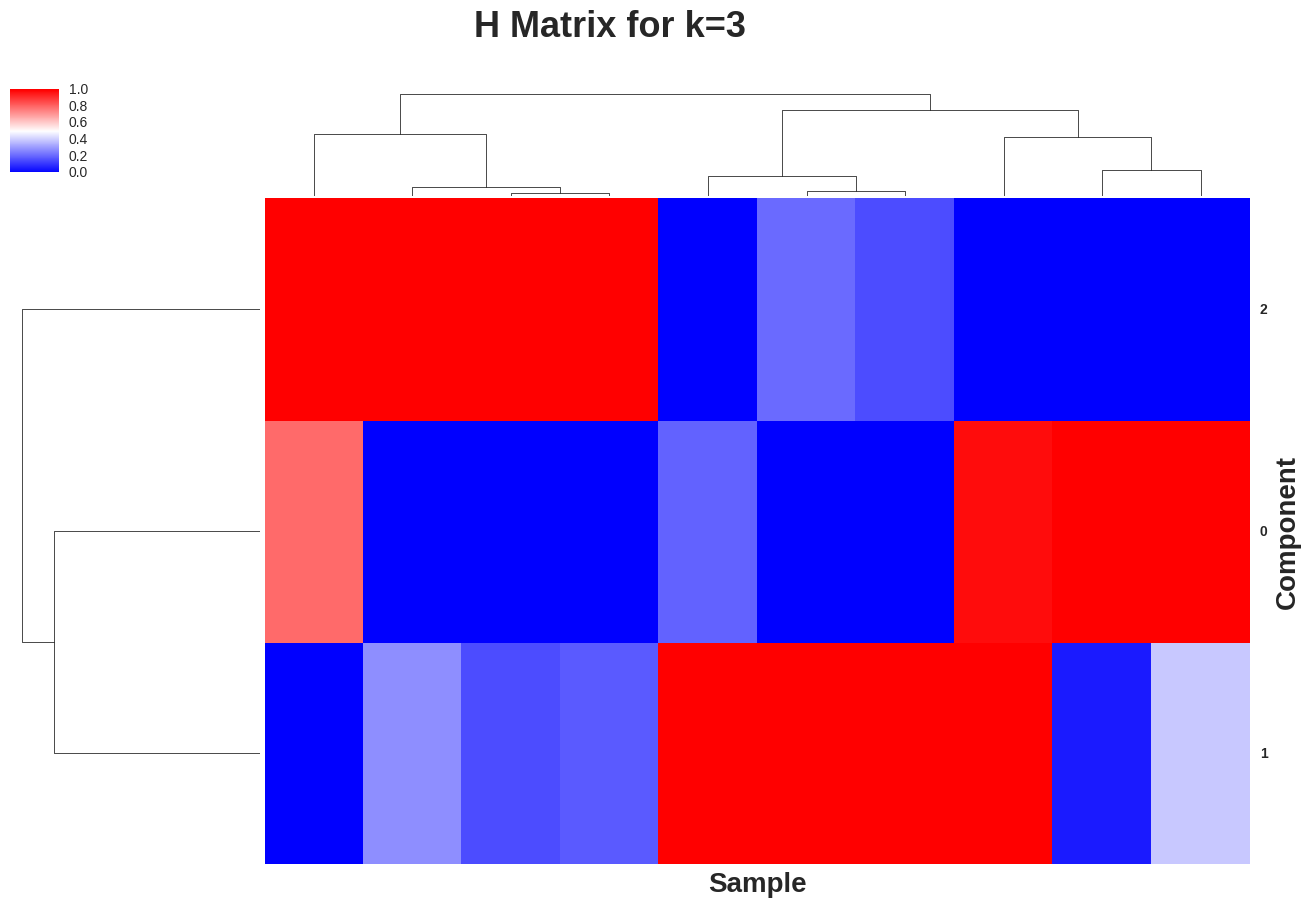

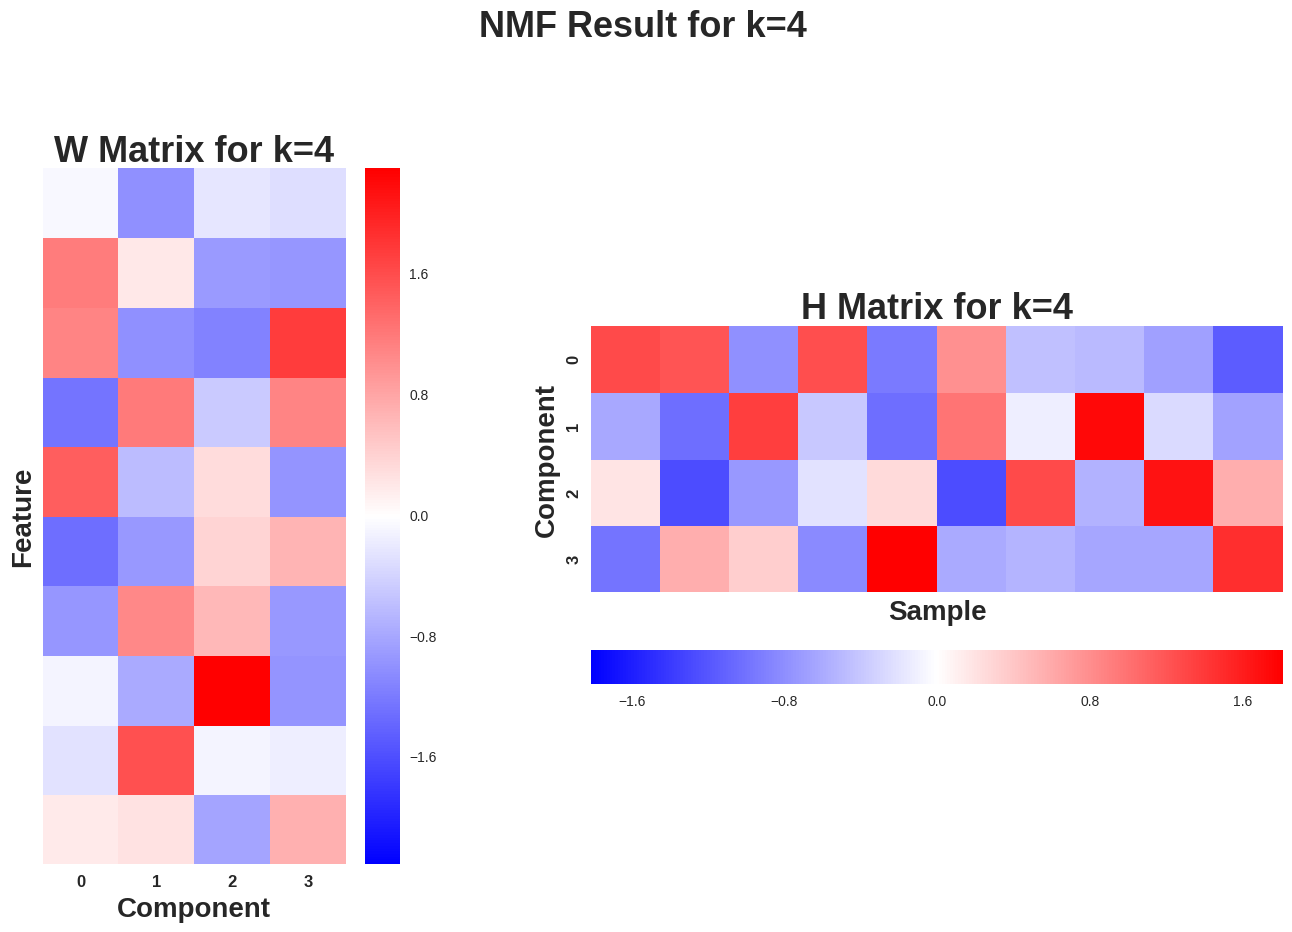

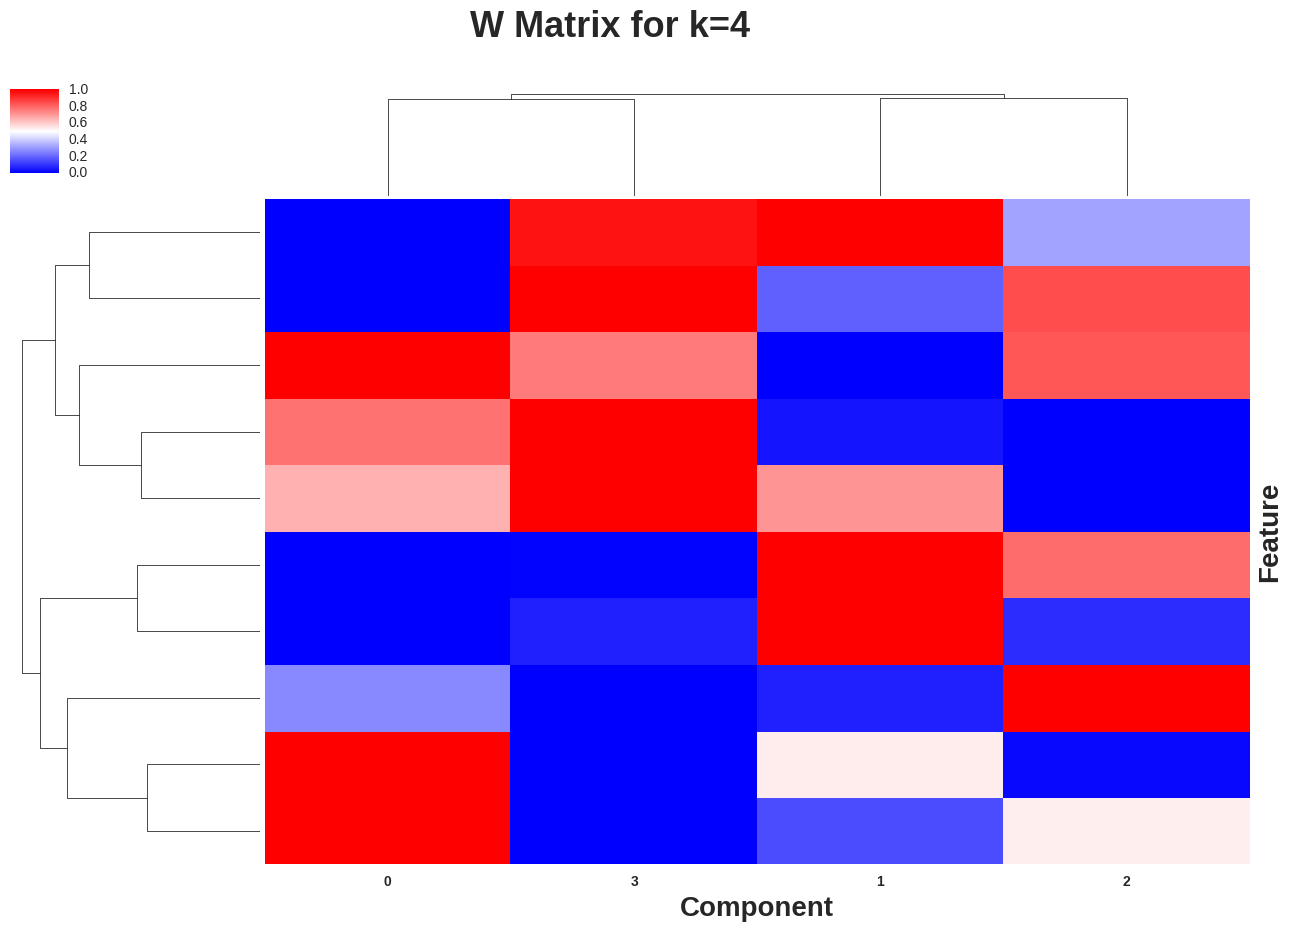

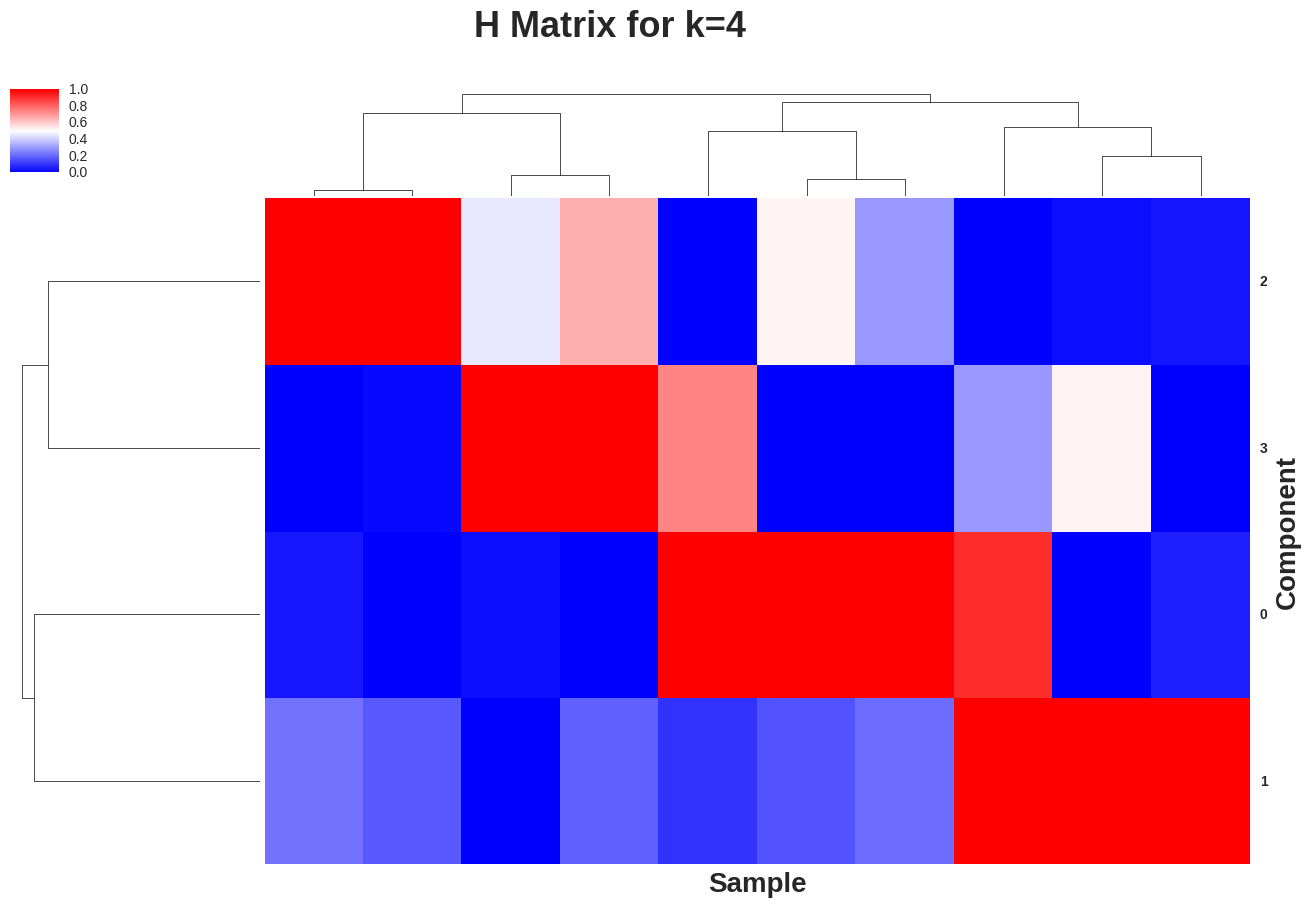

In [54]:
ccal.oncogps.define_components(matrix, [3,4])

Sample Feature
<145315> Computing cophenetic correlation coefficient of 100 NMF consensus clusterings ...
<145315> Not parallelizing ...
<145315> NMF and scoring k=3 ...
<145315> 	(k=3) NMF (0/100) ...
<145315> 		(k=3) Saved the 1st NMF decomposition.
<145315> 	(k=3) NMF (10/100) ...
<145316> 	(k=3) NMF (20/100) ...
<145316> 	(k=3) NMF (30/100) ...
<145316> 	(k=3) NMF (40/100) ...
<145316> 	(k=3) NMF (50/100) ...
<145317> 	(k=3) NMF (60/100) ...
<145317> 	(k=3) NMF (70/100) ...
<145317> 	(k=3) NMF (80/100) ...
<145317> 	(k=3) NMF (90/100) ...
<145317> 	(k=3) Making consensus matrix from 100 NMF ...
<145317> Plotting NMF decompositions and cophenetic correlation coefficients ...
<145317> 	Plotting k=3 ...


({3: {'e': 18898.005858793986,
   'h':     Sample 0   Sample 1   Sample 2   Sample 3   Sample 4   Sample 5  \
   0   0.000000  42.713333  43.711829   5.777717  71.793140  19.166671   
   1  58.958442   0.000000  99.117303  53.778609  49.757924  67.625376   
   2  60.452695  57.468418   0.714043  58.510649   5.874114  40.549823   
   
        Sample 6    Sample 7    Sample 8   Sample 9  
   0   10.788445   18.909074    6.775767  63.600886  
   1  111.526431  117.331088  119.082815  71.914933  
   2   17.387876    7.553128   12.403301   0.000000  ,
   'w':                     0          1           2
   Feature 0   35.220679  14.949179   55.589482
   Feature 1    0.000000  27.426897  109.762735
   Feature 2  133.372992   0.000000  104.837264
   Feature 3   96.563508  45.313407    0.000000
   Feature 4    1.614287  33.685122  123.697510
   Feature 5   83.049300  23.011838    0.000000
   Feature 6    0.000000  63.618457   16.473775
   Feature 7    6.126267  59.949422   58.549544
   Feature

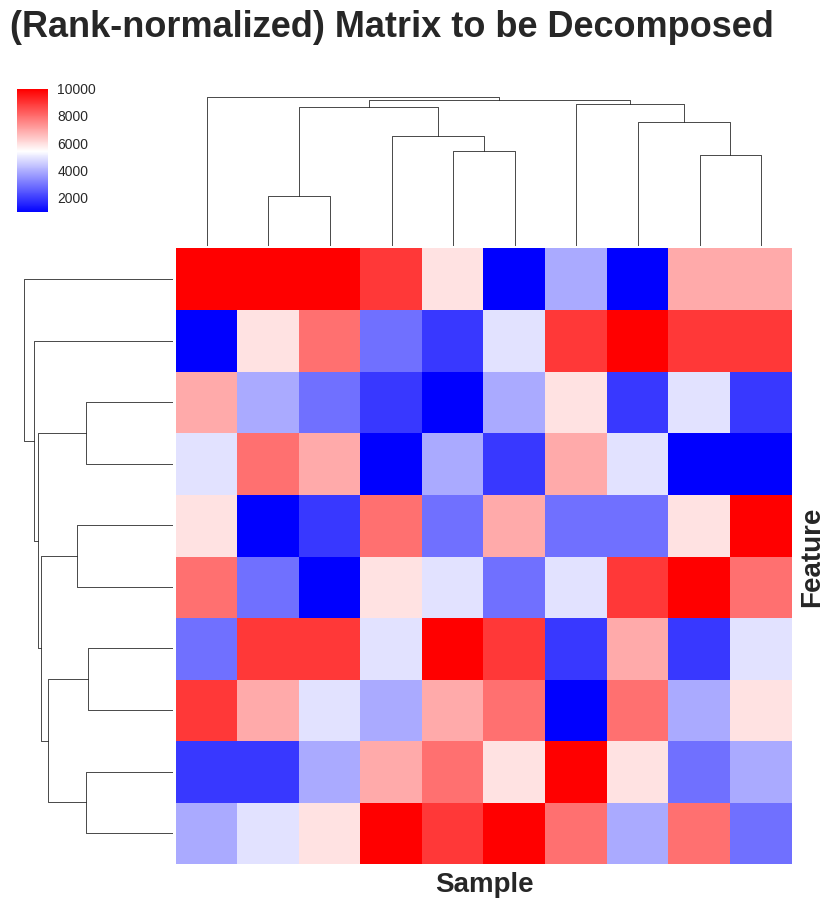

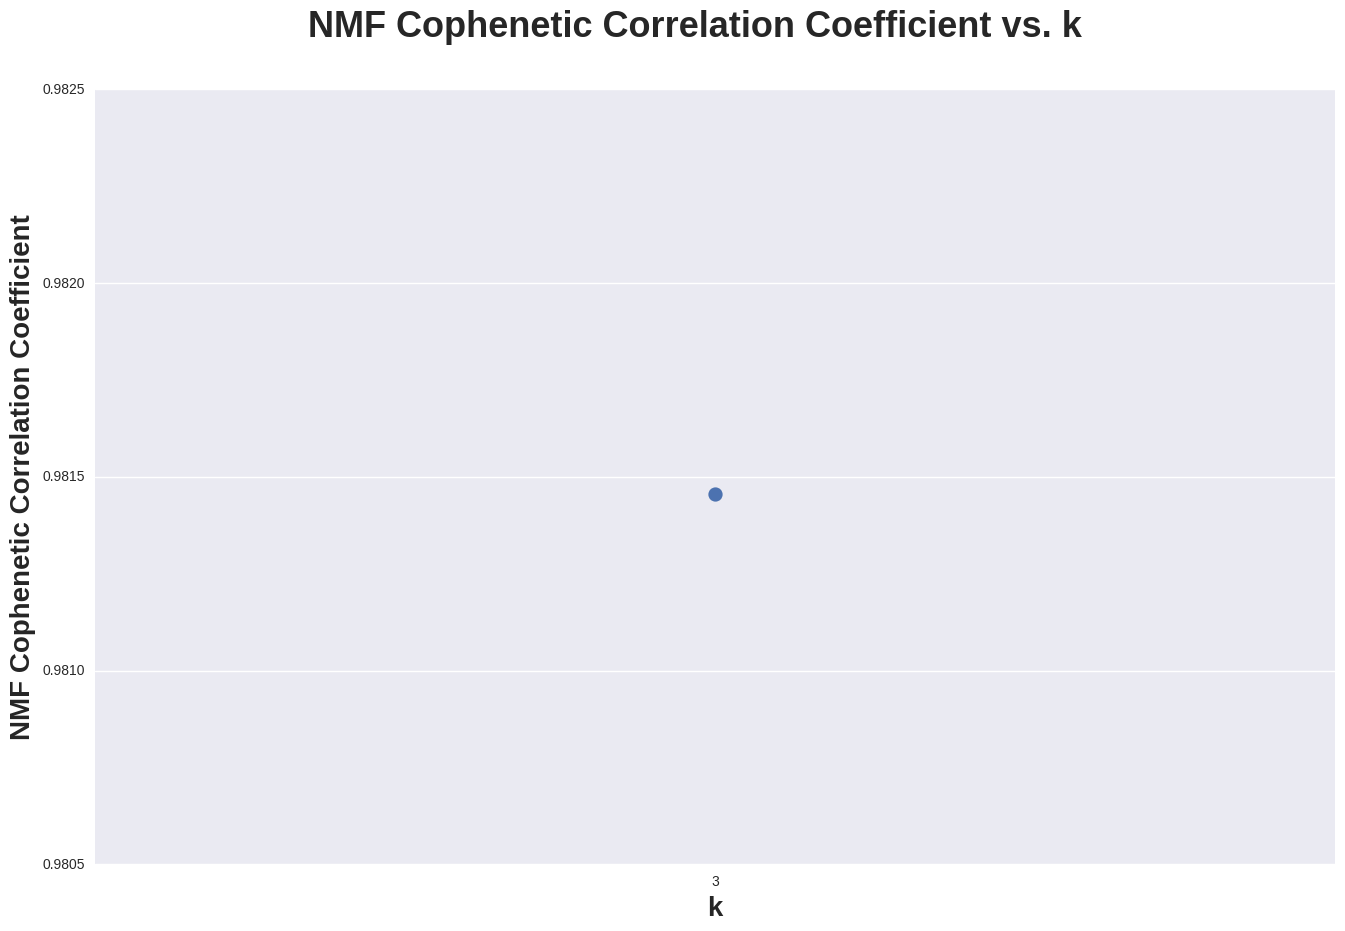

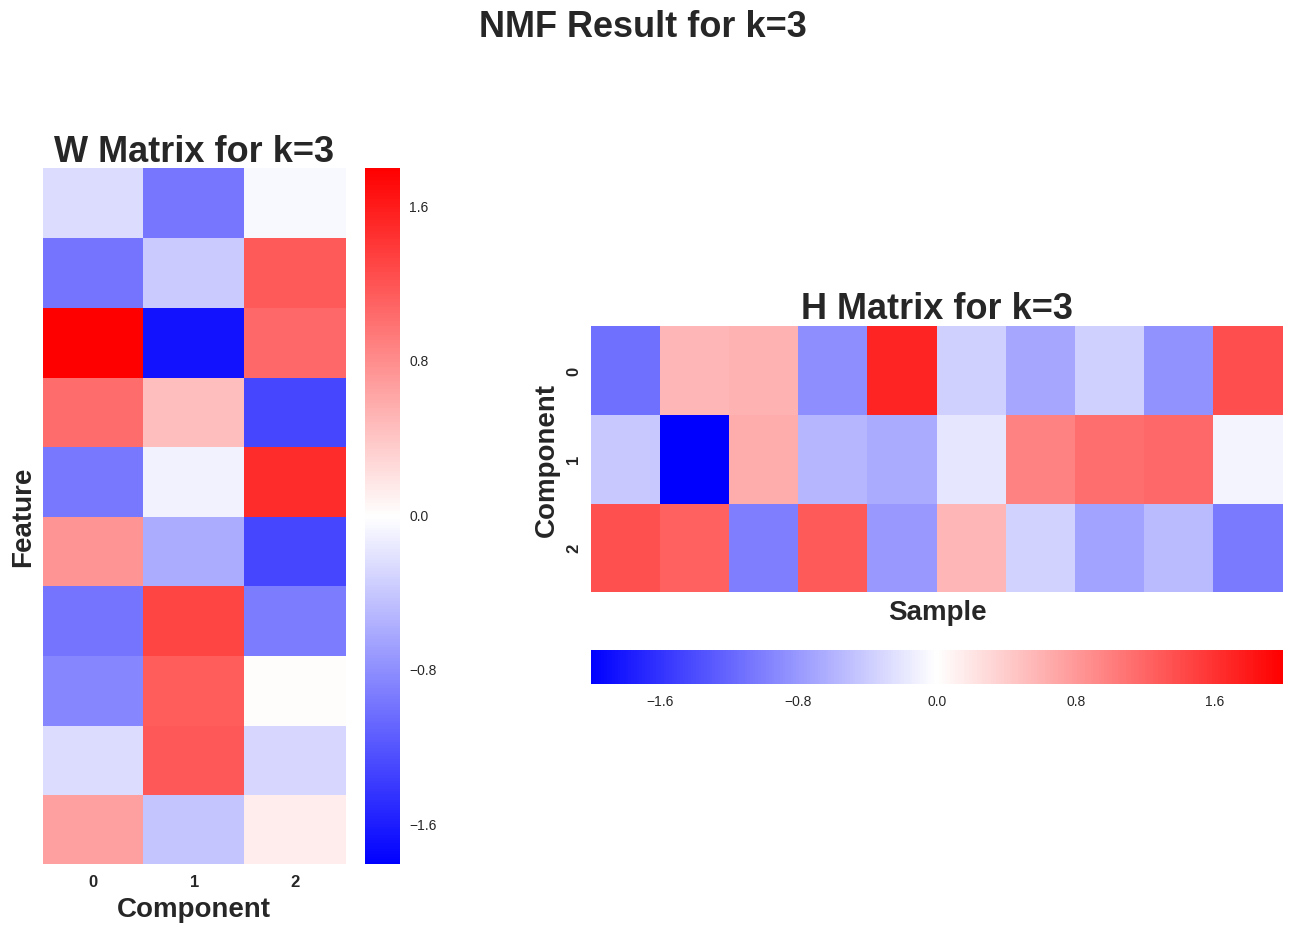

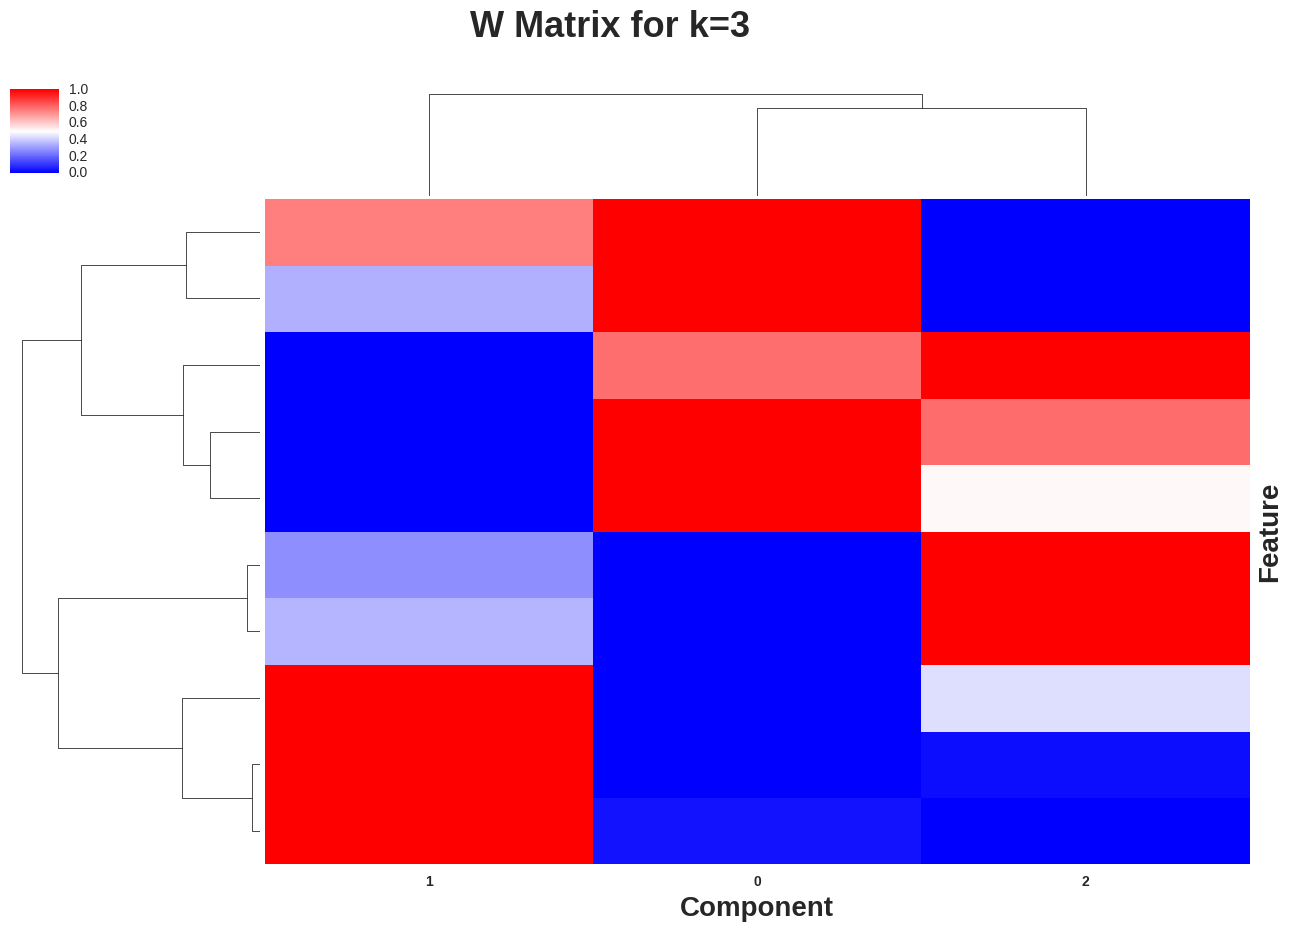

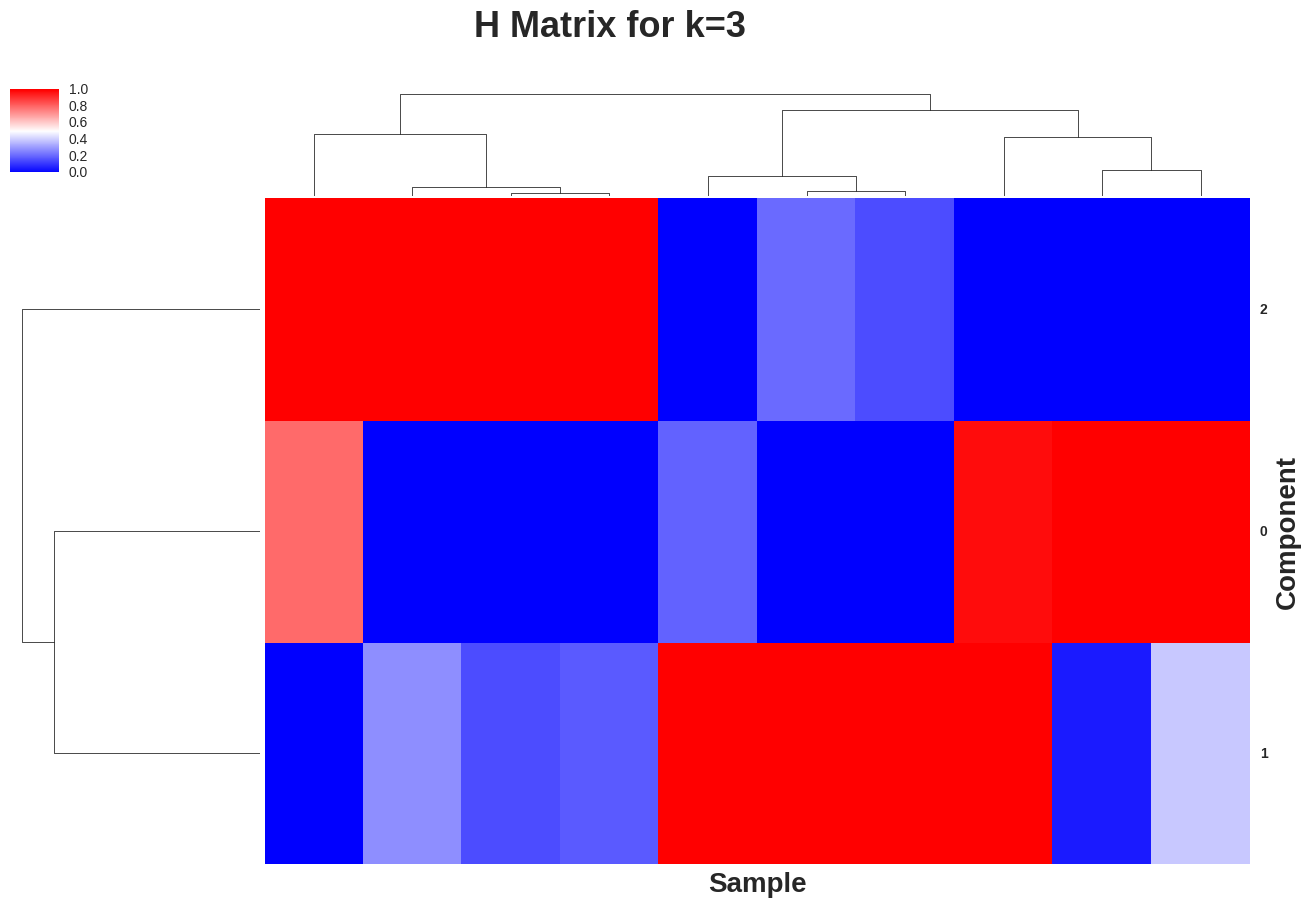

In [52]:
ccal.oncogps.define_components(matrix, 3)

## Define states

In [ ]:
ccal.define_states('data/hema_nmf_k9_h.gct', [3,4,5])

In [ ]:
h = ccal.support.read_gct('data/hema_nmf_k9_h.gct')
ks = [12]
# distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
#                                                                            ks,
#                                                                            n_clusterings=30,
#                                                                            max_std=5,
#                                                                            directory_path='result/define_states/')
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                           ks,
                                                                           distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                           n_clusterings=30,
                                                                           max_std=5)
state_labels = clusterings.ix[12, :]

## Make Onco-GPS with real data

In [ ]:
colors = ['#CD96CD', '#5CACEE', '#43CD80', '#FFA500', '#CD5555', '#F0A5AB', '#9AC7EF', '#D6A3FC', '#FFE1DC',
          '#FAF2BE', '#F3C7F2', '#C6FA60', '#F970F9', '#FC8962', '#F6E370', '#F0F442', '#AED4ED', '#D9D9D9',
          '#FD9B85', '#7FFF00', '#FFB90F', '#6E8B3D', '#8B8878', '#7FFFD4', '#00008B', '#D2B48C', '#006400']

output = ccal.make_oncogps_map(h, state_labels, component_ratio=2,
                               colors=colors[:12], component_markeredgewidth=2.6)

In [ ]:
output = ccal.make_oncogps_map(h, state_labels, component_ratio=2,
                               colors='paper', component_markeredgewidth=2.6,
                               filepath='result/make_oncogps_map.pdf')

## Project samples

In [ ]:
# output = ccal.make_oncogps_map(h, state_labels)
n = 10

output1 = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                                testing_h_normalization='using_training',
                                title='Using Training')
output2 = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                                testing_h_normalization='using_training',
                                title='Using Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization='as_training',
                               title='As Training')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization='as_training',
                               title='As Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization=None,
                               title='None')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization=None,
                               title='None')

try:
    output = ccal.make_oncogps_map(h, state_labels,
                                   testing_h=h, testing_states=state_labels,
                                   testing_h_normalization='foo')
except ValueError as e:
    print(e)

## Make Onco-GPS with random data

In [ ]:
for n_components in [3]:
    print('n_components:', n_components)
    for n_state in ks[::5]:
        print('n_state:', n_state)
        ccal.make_oncogps_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]))
        ccal.make_oncogps_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]), n_pulls=2)
        for annotation_type in ['continuous', 'categorical', 'binary']:
            print('annotation_type:', annotation_type)
            if annotation_type == 'continuous':
                annotation = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotation = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotation = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.make_oncogps_map(h.iloc[:n_components, :],
                                  np.random.choice(list(range(1, n_state + 1)), h.shape[1]),
                                  annotation=annotation,
                                  annotation_type=annotation_type)